In [1]:
from joblib import load, dump
from lightgbm import LGBMRegressor
from scipy.stats import uniform
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
from urllib.request import urlretrieve
import basilica
import category_encoders as ce
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('hostify.csv').drop(['longitude', 'latitude', 'id'], axis=1)
listings_summary = pd.read_csv('listings_summary.csv')

In [3]:
data.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,bathrooms,bedrooms
0,Mitte,Brunnenstr. Süd,Entire home/apt,60,4,4,141,1.0,1.0
1,Pankow,Prenzlauer Berg Nordwest,Private room,17,2,1,0,1.0,1.0
2,Pankow,Prenzlauer Berg Südwest,Entire home/apt,90,62,1,220,1.0,1.0
3,Tempelhof - Schöneberg,Schöneberg-Nord,Private room,26,5,1,297,1.0,1.0
4,Pankow,Helmholtzplatz,Private room,42,2,1,26,1.0,1.0


In [4]:
pd.set_option('display.max_rows', None)

In [5]:
data['neighbourhood_group'].nunique()

12

In [6]:
data['neighbourhood'].nunique()

136

In [7]:
data[data['neighbourhood_group'] == 'Mitte']['neighbourhood'].value_counts()

Alexanderplatz       1089
Brunnenstr. Süd       772
Wedding Zentrum       517
Moabit West           489
Moabit Ost            378
Parkviertel           355
Osloer Straße         347
Brunnenstr. Nord      279
Regierungsviertel     212
Tiergarten Süd        188
Name: neighbourhood, dtype: int64

In [7]:
encoder = ce.OrdinalEncoder()
data_encoded = encoder.fit_transform(data)

In [9]:
data_encoded.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,bathrooms,bedrooms
0,1,1,1,60,4,4,141,1.0,1.0
1,2,2,2,17,2,1,0,1.0,1.0
2,2,3,1,90,62,1,220,1.0,1.0
3,3,4,2,26,5,1,297,1.0,1.0
4,2,5,2,42,2,1,26,1.0,1.0


In [10]:
dir(encoder)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_dim',
 '_get_param_names',
 '_get_tags',
 'category_mapping',
 'cols',
 'drop_cols',
 'drop_invariant',
 'feature_names',
 'fit',
 'fit_transform',
 'get_feature_names',
 'get_params',
 'handle_missing',
 'handle_unknown',
 'inverse_transform',
 'mapping',
 'ordinal_encoding',
 'return_df',
 'set_params',
 'transform',
 'verbose']

In [11]:
encoder.ordinal_encoding

<function category_encoders.ordinal.OrdinalEncoder.ordinal_encoding(X_in, mapping=None, cols=None, handle_unknown='value', handle_missing='value')>

In [13]:
encoder.mapping[1]

{'col': 'neighbourhood',
 'mapping': Brunnenstr. Süd                                1
 Prenzlauer Berg Nordwest                       2
 Prenzlauer Berg Südwest                        3
 Schöneberg-Nord                                4
 Helmholtzplatz                                 5
 Frankfurter Allee Süd FK                       6
 nördliche Luisenstadt                          7
 südliche Luisenstadt                           8
 Tempelhofer Vorstadt                           9
 Prenzlauer Berg Süd                           10
 Moabit Ost                                    11
 Prenzlauer Berg Nord                          12
 Otto-Suhr-Allee                               13
 Schillerpromenade                             14
 Alt  Treptow                                  15
 Alexanderplatz                                16
 Neue Kantstraße                               17
 Ostpreußendamm                                18
 Schmöckwitz/Karolinenhof/Rauchfangswerder     19
 Neuköllner Mi

In [15]:
data_encoded['picture_url'] = pd.Series(listings_summary['picture_url'])
data_encoded.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,bathrooms,bedrooms,picture_url
0,1,1,1,60,4,4,141,1.0,1.0,https://a0.muscache.com/im/pictures/260fd609-7...
1,2,2,2,17,2,1,0,1.0,1.0,https://a0.muscache.com/im/pictures/97d4f6e8-1...
2,2,3,1,90,62,1,220,1.0,1.0,https://a0.muscache.com/im/pictures/243355/84a...
3,3,4,2,26,5,1,297,1.0,1.0,https://a0.muscache.com/im/pictures/29054294/b...
4,2,5,2,42,2,1,26,1.0,1.0,https://a0.muscache.com/im/pictures/21278/32a1...


In [34]:
data_encoded.shape

(22502, 10)

In [38]:
x=data_encoded[:1000].drop('picture_url', axis=1).copy()

In [39]:
x.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,bathrooms,bedrooms
0,1,1,1,60,4,4,141,1.0,1.0
1,2,2,2,17,2,1,0,1.0,1.0
2,2,3,1,90,62,1,220,1.0,1.0
3,3,4,2,26,5,1,297,1.0,1.0
4,2,5,2,42,2,1,26,1.0,1.0


In [29]:
urls = data_encoded['picture_url'].tolist()
for i in range(7219, len(urls)):
    urlretrieve(urls[i], f'images/image{i}.jpg')

KeyboardInterrupt: 

In [22]:
urls[1870]

'https://a0.muscache.com/im/pictures/53885107/660253bb_original.jpg?aki_policy=large'

In [85]:
with basilica.Connection('050b7261-9fa5-71aa-7bfa-7a287735e9b0') as c:
    embeddings = list(c.embed_image_files(f'images/image{x}.jpg' for x in range(1000)))

In [88]:
x.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
calculated_host_listings_count    0
availability_365                  0
bathrooms                         0
bedrooms                          0
picture_embeds                    0
0                                 0
1                                 0
2                                 0
3                                 0
4                                 0
5                                 0
6                                 0
7                                 0
8                                 0
9                                 0
10                                0
11                                0
12                                0
13                                0
14                                0
15                                0
16                                0
17                          

In [96]:
x.iloc[2,9]

[1.67251,
 0.119394,
 0.673949,
 2.02256,
 0.388755,
 0.0674603,
 0.0372619,
 0.343695,
 0.12239,
 0.0,
 0.0238388,
 0.382227,
 0.330262,
 0.00243601,
 0.0557481,
 0.508648,
 0.459858,
 1.24905,
 0.181317,
 0.00823566,
 0.37543,
 0.0851474,
 0.0972674,
 0.0448895,
 0.0,
 0.0,
 0.0,
 0.241084,
 0.0,
 1.03767,
 0.0703645,
 0.0,
 0.196533,
 0.293971,
 0.595552,
 0.0214716,
 2.93775,
 0.0521687,
 0.500587,
 0.0682237,
 0.0173474,
 1.6413,
 3.08208,
 0.409085,
 0.339573,
 0.700849,
 0.0278697,
 3.04158,
 0.94734,
 0.783206,
 0.0112985,
 0.135892,
 0.413631,
 1.1605,
 0.609125,
 0.150705,
 0.0,
 1.40786,
 0.0218841,
 0.00670697,
 0.0473721,
 0.673991,
 0.0624196,
 0.0425328,
 0.0325471,
 0.524351,
 0.0260817,
 0.141619,
 0.0245378,
 0.0961913,
 0.147953,
 0.866169,
 0.235908,
 0.00182994,
 0.247967,
 0.238453,
 0.0412137,
 0.176132,
 0.704208,
 0.0896557,
 0.552446,
 0.226759,
 0.376335,
 0.207335,
 0.00739165,
 0.046951,
 0.739159,
 0.274896,
 0.0570254,
 0.0,
 0.000228373,
 0.112033,
 0.08

In [97]:
for j in range(len(x)):
    for i in range(len(embeddings[0])):
        x.iloc[j, i+10] = embeddings[j][i]

In [98]:
x.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,bathrooms,bedrooms,picture_embeds,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,1,1,1,60,4,4,141,1.0,1.0,"[1.55954, 0.100007, 0.278939, 0.591966, 0.2214...",...,1.707590,0.252344,3.57042,0.937037,0.295102,0.132981,0.002389,0.573021,0.000000,0.058524
1,2,2,2,17,2,1,0,1.0,1.0,"[0.523957, 0.082891, 0.00162487, 0.109814, 0.1...",...,1.925700,0.792078,2.54058,0.533950,0.045884,0.213783,0.028988,0.179614,0.060361,0.593909
2,2,3,1,90,62,1,220,1.0,1.0,"[1.67251, 0.119394, 0.673949, 2.02256, 0.38875...",...,0.786504,0.448435,2.16416,1.568290,0.781248,0.000000,0.074388,0.088651,0.000000,0.124230
3,3,4,2,26,5,1,297,1.0,1.0,"[0.28935, 0.106694, 0.145357, 0.17358, 0.35118...",...,1.785540,0.287795,3.85233,1.052700,1.025130,0.041675,0.000000,0.431980,0.809171,0.353415
4,2,5,2,42,2,1,26,1.0,1.0,"[1.50347, 0.533996, 1.49036, 0.453256, 0.16132...",...,1.230740,0.050905,3.77277,1.734480,0.632017,0.073745,0.372121,0.930415,0.689620,0.084358


In [87]:
x['picture_embeds'] = pd.Series(embeddings)
len(x['picture_embeds'][0])

2048

In [99]:
train, test = train_test_split(x.drop('picture_embeds', axis=1), random_state=42, test_size=.2)
train.shape, test.shape

((800, 2057), (200, 2057))

In [103]:
target = 'price'
features = x.columns.drop([target, 'picture_embeds'])
features

Index([           'neighbourhood_group',                  'neighbourhood',
                            'room_type',                 'minimum_nights',
       'calculated_host_listings_count',               'availability_365',
                            'bathrooms',                       'bedrooms',
                                      0,                                1,
       ...
                                   2038,                             2039,
                                   2040,                             2041,
                                   2042,                             2043,
                                   2044,                             2045,
                                   2046,                             2047],
      dtype='object', length=2056)

In [104]:
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

In [105]:
lgb = LGBMRegressor(n_jobs=-1, n_estimators=500, random_state=42)
lgb.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=500, n_jobs=-1, num_leaves=31, objective=None,
              random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [107]:
y_pred = lgb.predict(X_test)
mean_absolute_error(y_pred, y_test)

44.48875703517933

In [140]:
feat_importance = pd.DataFrame({
    'Feature': features,
    'Importance': lgb.feature_importances_.tolist()
}).sort_values(by='Importance', ascending=False)
feat_importance['Importance']

340     217
624     192
189     180
20      179
1333    169
1775    159
1569    157
1930    154
527     141
582     125
0       104
1596    102
2029     94
136      91
1317     88
331      87
1        80
1195     80
1369     79
313      75
7        74
460      68
2046     65
1183     64
597      61
310      59
35       56
6        49
1996     46
157      45
1854     45
941      45
1098     45
178      44
1436     43
1074     42
105      41
1831     40
888      39
1058     39
948      39
730      38
107      37
314      36
52       36
1448     33
707      32
1075     32
491      31
1035     31
336      31
539      31
782      30
5        30
1916     30
1540     29
461      29
1660     27
769      27
1857     26
799      25
1983     25
1465     25
1872     24
926      24
731      24
1716     24
4        23
883      23
425      23
1515     23
255      22
1556     22
961      22
1328     22
1121     22
813      21
1173     21
1181     21
1386     21
752      21
678      21
987      21
653 

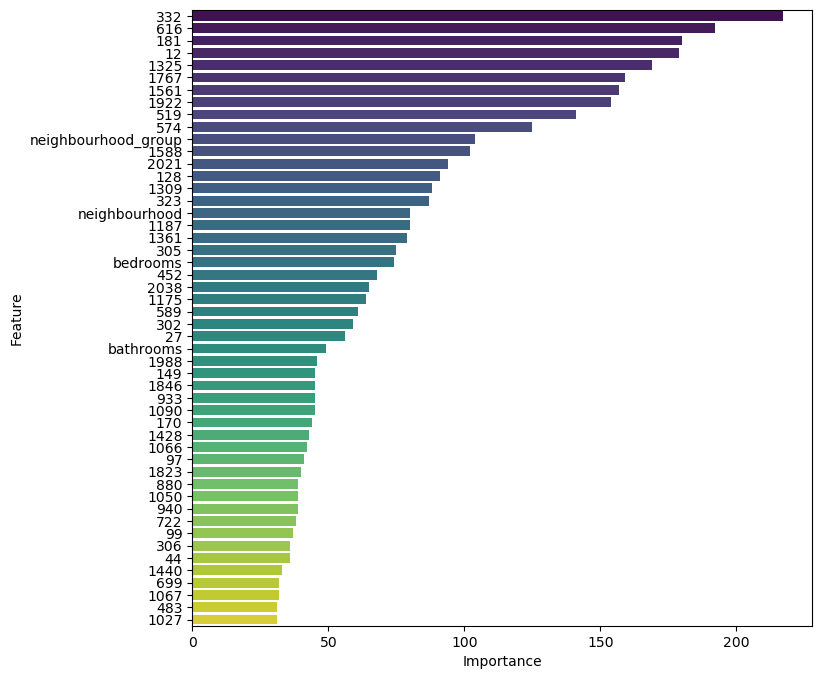

In [145]:
with plt.style.context('default'):
    fig, ax = plt.subplots(figsize=(8,8))
    sns.barplot(data=feat_importance[:50], y='Feature', x='Importance', palette='viridis')

In [8]:
train, test = train_test_split(data_encoded, random_state=42, test_size=.2)
train.shape, test.shape

((18001, 9), (4501, 9))

In [9]:
target = 'price'
features = data.columns.drop(target)
features

Index(['neighbourhood_group', 'neighbourhood', 'room_type', 'minimum_nights',
       'calculated_host_listings_count', 'availability_365', 'bathrooms',
       'bedrooms'],
      dtype='object')

In [10]:
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

In [258]:
lgbm = LGBMRegressor(n_jobs=-1, random_state=42)
params = {
    'n_estimators' : [500, 1000, 2000],
    'boosting' : ['gbdt', 'goss'],
    'learning_rate' : [.05, .1, .15, .2],
    'objective' : ['l1', 'l2'],
    'max_depth' : [0, 2, 5, 10]
}

In [259]:
search = GridSearchCV(
    lgbm,
    param_grid=params,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    cv=5,
    verbose=10,
    return_train_score=True,
)

In [260]:
search.fit(X_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   34.3s
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:   40.1s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   45.2s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 113 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 189 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 210 tasks      | elapsed: 

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state=42,
                                     reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='warn', n_jobs=-1,
             param_grid={'boosting': ['gbdt', 'goss'],
                         'learning_rate': [0.05, 0.1, 0.15, 0.2],
                         'max_depth': [0, 2, 5, 10],


In [60]:
dir(search)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_is_fitted',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_required_parameters',
 '_run_search',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'iid',
 'inverse_transform',
 'multimetric_',
 'n_jobs',
 'n_splits_',
 'param_grid',
 'pre_dispatch',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'refit',
 'refit_time_',
 'return_train_score',
 'score',
 'scorer_',
 'scoring',
 '

In [261]:
search.best_estimator_

LGBMRegressor(boosting='gbdt', boosting_type='gbdt', class_weight=None,
              colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
              max_depth=10, min_child_samples=20, min_child_weight=0.001,
              min_split_gain=0.0, n_estimators=2000, n_jobs=-1, num_leaves=31,
              objective='l1', random_state=42, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)

In [262]:
search.best_score_

-26.7068680331063

In [263]:
best_lgbm = search.best_estimator_
best_lgbm.fit(X_train, y_train)

LGBMRegressor(boosting='gbdt', boosting_type='gbdt', class_weight=None,
              colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
              max_depth=10, min_child_samples=20, min_child_weight=0.001,
              min_split_gain=0.0, n_estimators=2000, n_jobs=-1, num_leaves=31,
              objective='l1', random_state=42, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)

In [264]:
y_pred = best_lgbm.predict(X_test)
mean_absolute_error(y_pred, y_test)

19.483172811090466

In [266]:
dump(best_lgbm, 'model.joblib', compress=True)

['model.joblib']

In [4]:
import joblib
import sklearn
import lightgbm
print(f'joblib=={joblib.__version__}')
print(f'scikit-learn=={sklearn.__version__}')
print(f'lightgbm=={lightgbm.__version__}')

joblib==0.14.0
scikit-learn==0.21.3
lightgbm==2.3.0


In [5]:
model = load('model.joblib')

In [15]:
y_pred = model.predict(X_test)
y_pred

array([239.88098938,  38.00554399,  59.53106092, ...,  51.04332797,
        66.38068924,  41.04729934])

In [24]:
(y_test == 0).value_counts()

False    4501
Name: price, dtype: int64

In [26]:
mean_absolute_error(y_test, y_pred)

19.48272846538951

In [27]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))

In [28]:
mean_absolute_percentage_error(y_test, y_pred)

0.36627007242544857

In [61]:
row = pd.DataFrame(columns=['neighbourhood_group', 'neighbourhood', 'room_type', 'minimum_nights',
       'calculated_host_listings_count', 'availability_365', 'bathrooms',
       'bedrooms'], data=[[1,1,1,1,1,1,1,1]])

In [62]:
model.predict(row)[0].round(2)

69.16

In [ ]:
def predict(a,b,c,d,e,f,g,h):
    x = pd.DataFrame(
        columns=['neighbourhood_group', 'neighbourhood', 'room_type', 'minimum_nights',
                 'calculated_host_listings_count', 'availability_365', 'bathrooms',
                 'bedrooms'], data=[[a,b,c,d,e,f,g,h]]
    )
    prediction = model.predict(x)[0].round(2)
    return prediction